In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install -q git+https://github.com/tensorflow/docs

In [0]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Bike_sharing/cleaned_csv/cleaned_data2.csv')

In [0]:
clustered_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Bike_sharing/cleaned_csv/clustered_data.csv')

In [0]:
data

,station_number,month,day,hour,dayOfWeek,workingday,total_trips
0,31000,1,1,11,0,1,2
1,31000,1,1,13,0,1,1
2,31000,1,1,15,0,1,2
3,31000,1,2,9,1,1,1
4,31000,1,2,9,2,1,2
...,...,...,...,...,...,...,...
2497169,32609,12,23,15,0,1,1
2497170,32609,12,24,7,1,1,1
2497171,32609,12,28,11,5,0,1
2497172,32609,12,28,14,5,0,2


In [0]:
clustered_data

,grouped_station,seasons,dayOfWeek,hour,total_trips
0,0.0,0,0,0,1
1,0.0,0,0,1,1
2,0.0,0,0,2,1
3,0.0,0,0,3,1
4,0.0,0,0,4,1
...,...,...,...,...,...
6563,9.0,3,6,19,1
6564,9.0,3,6,20,1
6565,9.0,3,6,21,1
6566,9.0,3,6,22,1


In [0]:
train_dataset_clean = data.sample(frac=0.8,random_state=0)
test_dataset_clean = data.drop(train_dataset_clean.index)

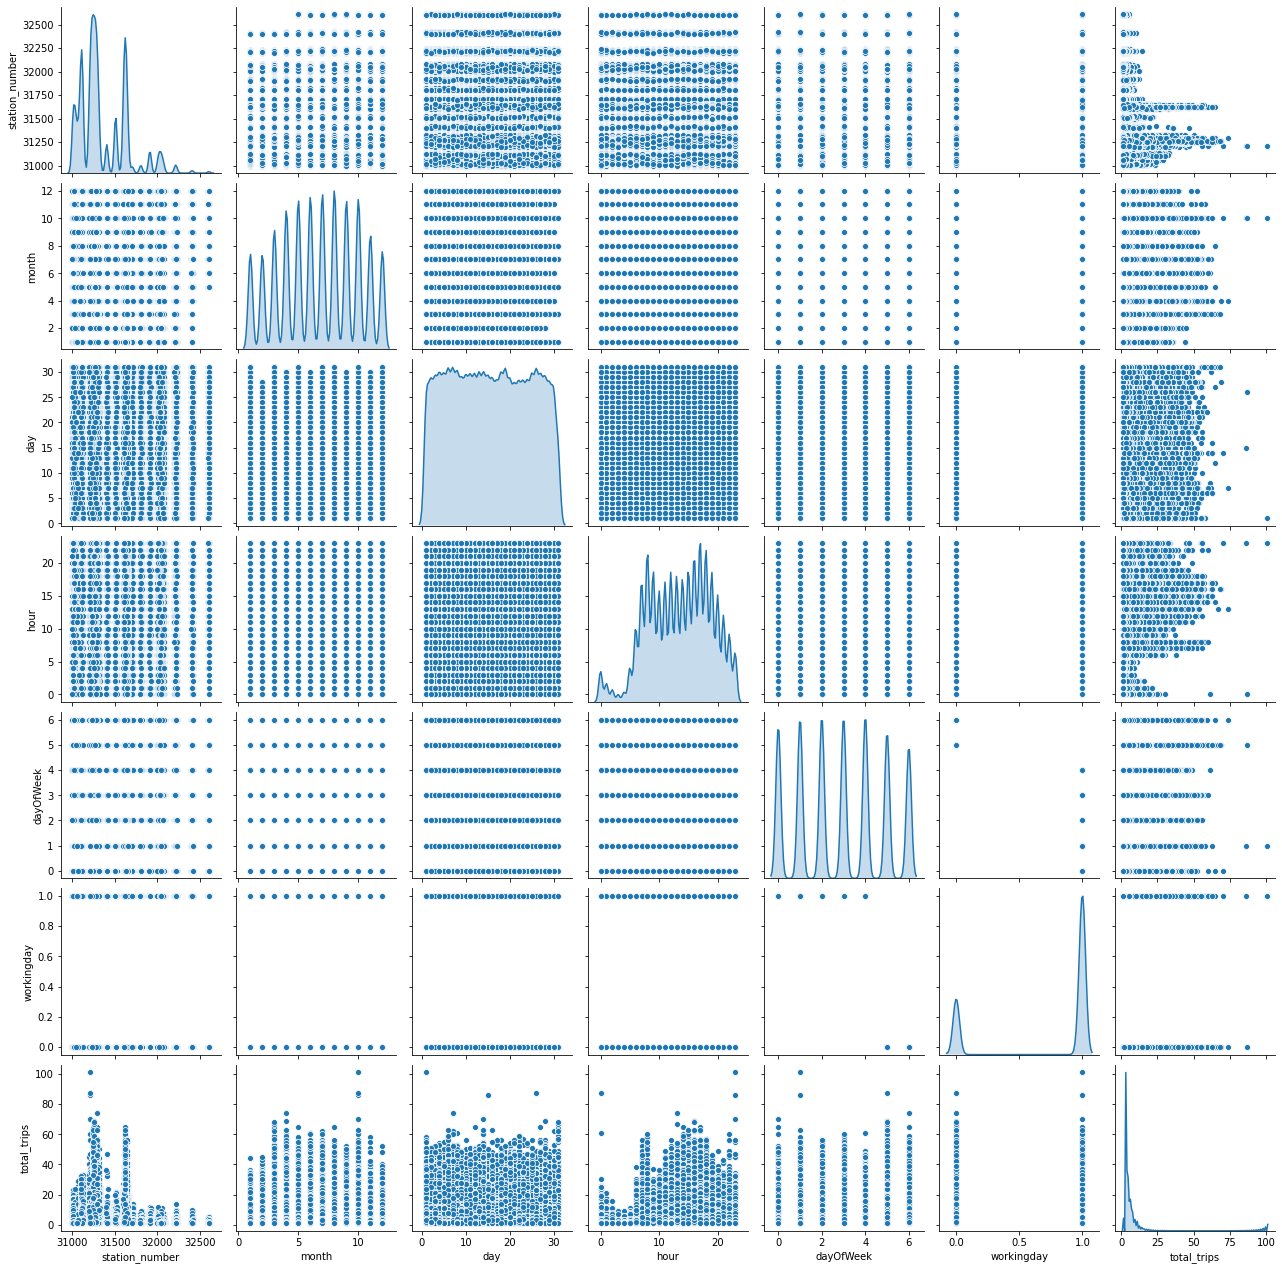

In [0]:
sns.pairplot(train_dataset_clean[["station_number", "month", "day", "hour", "dayOfWeek", "workingday", "total_trips"]], diag_kind="kde")

In [0]:
# non-clustered data modelling
train_stats_clean = train_dataset_clean.describe()
train_stats_clean.pop("total_trips")
train_stats_clean = train_stats_clean.transpose()

train_labels_clean = train_dataset_clean.pop('total_trips')
test_labels_clean = test_dataset_clean.pop('total_trips')


def norm(x):
  return (x - train_stats_clean['mean']) / train_stats_clean['std']
normed_train_data_clean = norm(train_dataset_clean)
normed_test_data_clean = norm(test_dataset_clean)

print(normed_train_data_clean)

         station_number     month       day      hour  dayOfWeek  workingday
61458         -1.245303 -1.467366  0.259129  0.284801   1.579001   -1.694031
965841        -0.438410  1.682244  0.145680 -1.231350  -0.982760    0.590308
539597        -0.865376  1.682244  0.032230 -1.231350  -1.495112    0.590308
2111825        0.983604  0.107439  1.620525  0.474320  -1.495112    0.590308
125184        -1.201883  0.737361 -1.102267 -2.368463   0.554296    0.590308
...                 ...       ...       ...       ...        ...         ...
1949467        0.918474  1.052322 -0.194669 -0.473274   1.579001   -1.694031
739208        -0.528869 -0.207522 -0.194669  0.474320   0.554296    0.590308
235685        -1.075240 -1.782327 -0.875367 -0.473274  -0.982760    0.590308
968639        -0.434791 -0.837444  1.280176 -0.283755   0.554296    0.590308
699723        -0.554197 -0.837444 -0.875367 -2.557982  -1.495112    0.590308

[1997739 rows x 6 columns]


In [0]:
# non clustered model
def build_model_clean():
  model1 = Sequential()
  l = len(train_dataset_clean.keys())
  model1.add(Dense(64, activation='relu', input_shape=[l]))
  model1.add(Dense(16, activation='relu'))
  model1.add(Dense(8, activation='relu'))
  model1.add(Dense(1)) 
  

  optimizer = tf.keras.optimizers.RMSprop(0.01)

  model1.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model1


model1 = build_model_clean()

print(model.summary())



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                448       
_________________________________________________________________
dense_22 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_23 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 9         
Total params: 1,633
Trainable params: 1,633
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model1 = build_model_clean()
EPOCHS=100
# The patience parameter is the amount of epochs to check for improvement
early_stop_clean = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history_clean = model1.fit(normed_train_data_clean, train_labels_clean, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop_clean, tfdocs.modeling.EpochDots()])
hist_clean = pd.DataFrame(early_history_clean.history)
hist_clean['epoch'] = early_history_clean.epoch
hist_clean.tail()


Epoch: 0, loss:7.8314,  mae:1.7083,  mse:7.8314,  val_loss:7.7597,  val_mae:1.6292,  val_mse:7.7597,  
.......................

,val_loss,val_mae,val_mse,loss,mae,mse,epoch
18,8.325103,1.984356,8.325108,7.715123,1.706773,7.715127,18
19,8.139016,1.881567,8.139022,7.725277,1.706223,7.725313,19
20,7.827645,1.705046,7.827631,7.785585,1.699391,7.785599,20
21,8.545144,1.770374,8.545172,7.971079,1.717887,7.971089,21
22,9.351284,1.907830,9.351339,8.803758,1.851349,8.803765,22


In [0]:
test_predictions_clean = model1.predict(normed_test_data_clean).flatten()

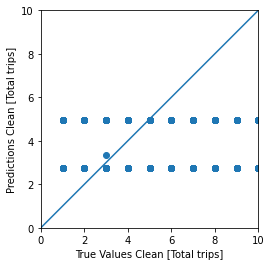

In [0]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels_clean, test_predictions_clean)
plt.xlabel('True Values Clean [Total trips]')
plt.ylabel('Predictions Clean [Total trips]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [0]:
example_batch_clean = test_dataset_clean[:10]
example_result_clean = model1.predict(example_batch_clean)
print(test_dataset_clean[:10])
print(example_result_clean)

    station_number  month  day  hour  dayOfWeek  workingday
3            31000      1    2     9          1           1
8            31000      1    3     9          3           1
15           31000      1    6    13          5           0
17           31000      1    6    23          6           0
21           31000      1    8    14          1           1
25           31000      1   10     8          2           1
26           31000      1   10     8          3           1
28           31000      1   10    15          3           1
29           31000      1   10    17          3           1
34           31000      1   12    16          5           0
[[2.7273867]
 [2.7273867]
 [2.7273867]
 [2.7273867]
 [2.7273867]
 [2.7273867]
 [2.7273867]
 [2.7273867]
 [2.7273867]
 [2.7273867]]


In [0]:
train_dataset_cluster = clustered_data.sample(frac=0.8,random_state=0)
test_dataset_cluster = clustered_data.drop(train_dataset_cluster.index)

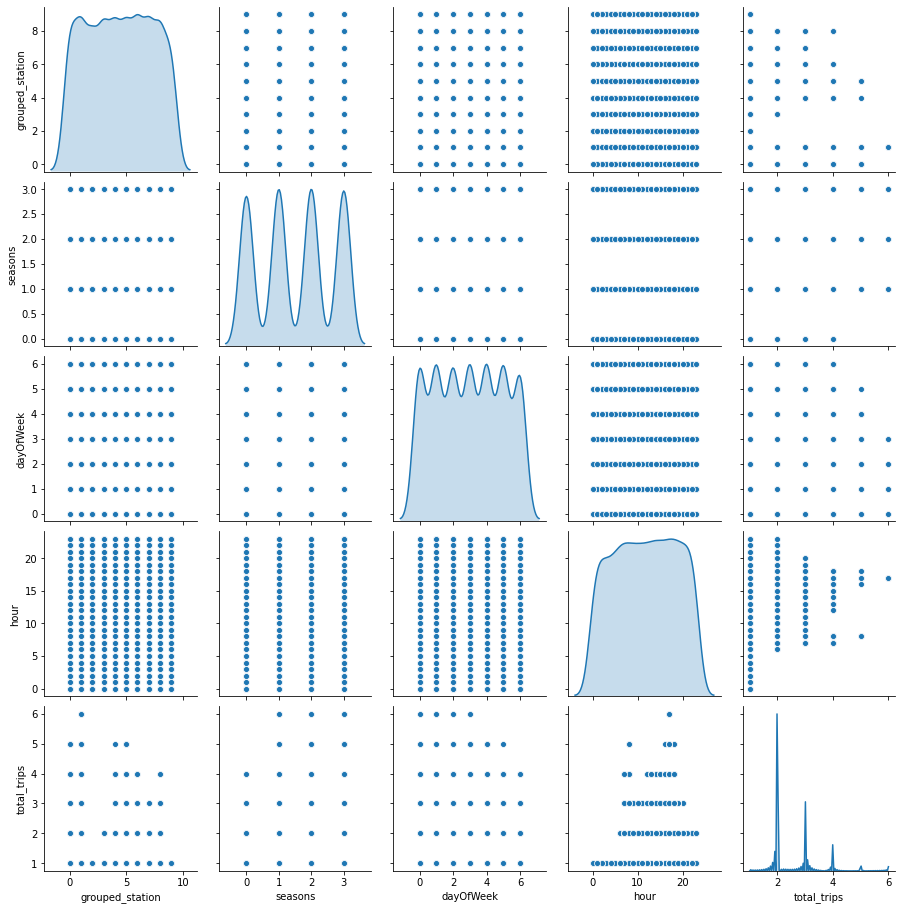

In [0]:
sns.pairplot(train_dataset_cluster[["grouped_station", "seasons", "dayOfWeek", "hour", "total_trips"]], diag_kind="kde")

In [0]:
# clustered data modelling
train_stats_cluster = train_dataset_cluster.describe()
train_stats_cluster.pop("total_trips")
train_stats_cluster = train_stats_cluster.transpose()

train_labels_cluster = train_dataset_cluster.pop('total_trips')
test_labels_cluster = test_dataset_cluster.pop('total_trips')


def norm(x):
  return (x - train_stats_cluster['mean']) / train_stats_cluster['std']
normed_train_data_cluster = norm(train_dataset_cluster)
normed_test_data_cluster = norm(test_dataset_cluster)

print(normed_train_data_cluster)

      grouped_station   seasons  dayOfWeek      hour
3060        -0.156269  0.437895   0.510492 -1.268454
5349         1.249019 -1.361636  -0.992941  0.040213
5540         1.249019 -0.461870  -0.491797 -0.105195
3029        -0.156269  0.437895  -0.491797  1.203472
878         -1.210236 -0.461870  -0.992941  0.331028
...               ...       ...        ...       ...
5847         1.249019  1.337660  -0.992941 -0.832232
542         -1.561558  1.337660  -0.992941  0.331028
2725        -0.156269 -1.361636   0.510492 -1.123047
2454        -0.507592  0.437895   1.512780  1.203472
1459        -0.858914 -1.361636   1.011636  1.494287

[5254 rows x 4 columns]


In [0]:
# clustered model
def build_model_cluster():
  model2 = Sequential()
  l = len(train_dataset_cluster.keys())
  model2.add(Dense(64, activation='relu', input_shape=[l]))
  model2.add(Dense(16, activation='relu'))
  model2.add(Dense(8, activation='relu'))
  model2.add(Dense(1)) 

  optimizer = tf.keras.optimizers.RMSprop(0.1)

  model2.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model2


model2 = build_model_cluster()

print(model2.summary())




Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_34 (Dense)             (None, 16)                1040      
_________________________________________________________________
dense_35 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 9         
Total params: 1,505
Trainable params: 1,505
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model2 = build_model_cluster()
EPOCHS=20
# The patience parameter is the amount of epochs to check for improvement
early_stop_cluster = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history_cluster = model2.fit(normed_train_data_cluster, train_labels_cluster, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop_cluster, tfdocs.modeling.EpochDots()])
hist_cluster = pd.DataFrame(early_history_cluster.history)
hist_cluster['epoch'] = early_history_cluster.epoch
hist_cluster.tail()


Epoch: 0, loss:35.5636,  mae:0.9841,  mse:35.5636,  val_loss:0.4963,  val_mae:0.4962,  val_mse:0.4963,  
....................

,val_loss,val_mae,val_mse,loss,mae,mse,epoch
15,0.423556,0.494121,0.423556,0.433574,0.416992,0.433574,15
16,0.505045,0.545143,0.505045,0.391863,0.393795,0.391862,16
17,0.451665,0.331779,0.451665,0.399873,0.406108,0.399873,17
18,0.514403,0.305438,0.514403,0.392413,0.399963,0.392413,18
19,0.410134,0.394853,0.410134,0.407996,0.399263,0.407996,19


In [0]:
test_predictions_cluster = model2.predict(normed_test_data_cluster).flatten()

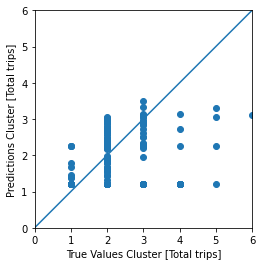

In [0]:
b = plt.axes(aspect='equal')
plt.scatter(test_labels_cluster, test_predictions_cluster)
plt.xlabel('True Values Cluster [Total trips]')
plt.ylabel('Predictions Cluster [Total trips]')
lims = [0, 6]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [0]:
example_batch_cluster = test_dataset_cluster[:10]
example_result_cluster = model2.predict(example_batch_cluster)
print(test_dataset_cluster[:10])
print(example_result_cluster)

    grouped_station  seasons  dayOfWeek  hour
0               0.0        0          0     0
7               0.0        0          0     7
21              0.0        0          0    21
24              0.0        0          1     0
25              0.0        0          1     1
28              0.0        0          1     4
35              0.0        0          1    11
56              0.0        0          2     8
60              0.0        0          2    12
62              0.0        0          2    14
[[1.5437367]
 [1.5437367]
 [1.5437367]
 [1.5437367]
 [1.5437367]
 [1.5437367]
 [1.5437367]
 [1.5437367]
 [1.5437367]
 [1.5437367]]
